# Zuber
Zuber is a new ride- sharing company that launched in Chicago. We are finding patterns in the datasets below to better understand passenger preferences and the impact of external factors on rides. We will analyze data from competitors and test a hypothesis about the impact of weather on ride frequency. Hop in and let's go!

## Data Description
- company_name: taxi company name

- trips_amount: the number of rides for each taxi company on November 15-16, 2017

- dropoff_location_name: Chicago neighborhoods where rides ended

- average_trips: the average number of rides that ended in each neighborhood in November 2017

- start_ts: pickup date and time

- weather_conditions: weather conditions at the moment the ride started

- duration_seconds: ride duration in seconds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
company_info = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_info = pd.read_csv('/datasets/project_sql_result_04.csv')
pickup_info = pd.read_csv('/datasets/project_sql_result_07.csv')

## Understanding company info and dropoff info datasets

In [3]:
 company_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
company_info.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
company_info.tail()

,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3
63,3556 - 36214 RC Andrews Cab,2


In [6]:
company_info.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [7]:
company_info.duplicated().sum()

0

In [8]:
dropoff_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
dropoff_info.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [10]:
dropoff_info.tail()

,dropoff_location_name,average_trips
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000


In [11]:
dropoff_info.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [12]:
dropoff_info.duplicated().sum()

0

## Summary on company info and dropoff info
- There are 64 entries in the company_info dataframe. The first 5 and the last 5 rows have been displayed.
- There are 0 missing values and 0 duplicated values in the company_info file.
- There are 94 entries in the dropoff_info dataframe. The first 5 and the last 5 rows have been displayed.
- There are 0 missing values and 0 duplicated values in the dropoff_info file.

## Studying the data

In [13]:
# change the datatype for 'average_trips' from float64 to int64
dropoff_info['average_trips'] = dropoff_info['average_trips'].astype('int64')
display(dropoff_info.dtypes)

dropoff_location_name    object
average_trips             int64
dtype: object

The average trips column was changed from a float to integer to better suit the ongoing analysis.

In [14]:
# top 10 neighborhoods in terms of dropoffs
sorted_dropoff_info = dropoff_info.sort_values(by='average_trips', ascending=False)
top_10_neighborhoods = sorted_dropoff_info.head(10)
display(top_10_neighborhoods)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


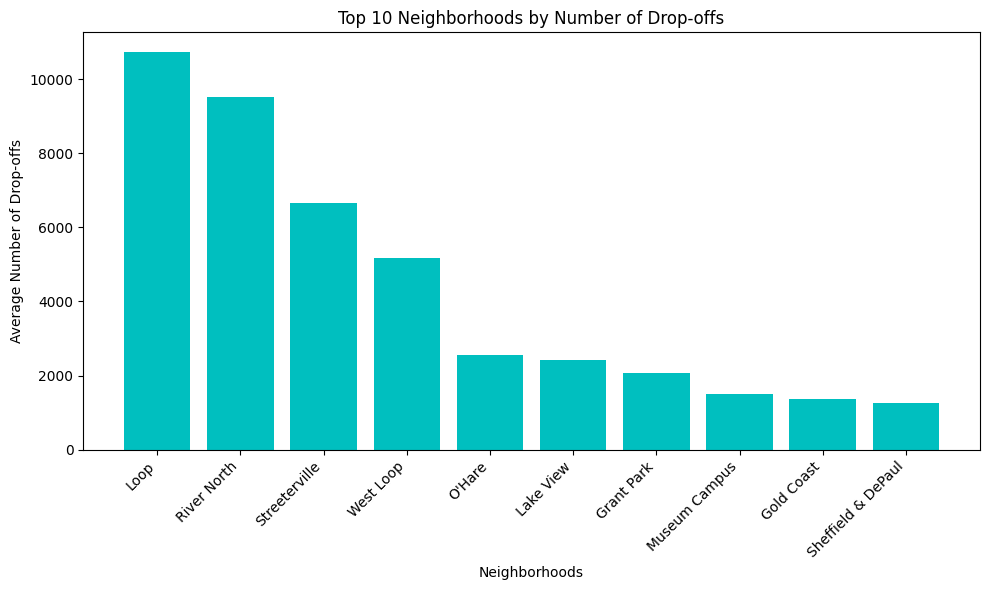

In [15]:
# sort the df by 'average_trips' in descending order
sorted_dropoff_info = dropoff_info.sort_values(by='average_trips', ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_dropoff_info['dropoff_location_name'][:10], sorted_dropoff_info['average_trips'][:10], color='c')
plt.xlabel('Neighborhoods')
plt.ylabel('Average Number of Drop-offs')
plt.title('Top 10 Neighborhoods by Number of Drop-offs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

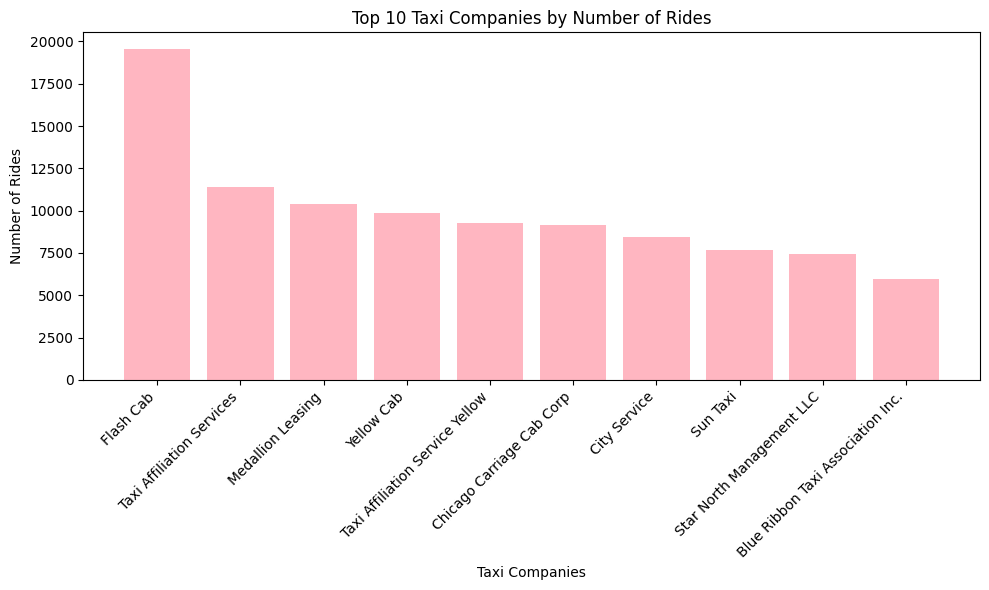

In [16]:
# sort the df by 'trips_amount' in descending order
sorted_company_info = company_info.sort_values(by='trips_amount', ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_company_info['company_name'][:10], sorted_company_info['trips_amount'][:10], color='lightpink')
plt.xlabel('Taxi Companies')
plt.ylabel('Number of Rides')
plt.title('Top 10 Taxi Companies by Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary on the above graphs
- The top 10 neighborhoods in terms of dropoffs are displayed.
- The number one dropoff is the Loop, averaging almost 11,000 trips.
- With close to 20,000 rides, Flash Cab almost doubles the other 9 companies according to the second graph.

## Testing the hypothesis

In [17]:
# extract durations for rainy and non-rainy Saturdays
rainy_durations = pickup_info[pickup_info['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_durations = pickup_info[pickup_info['weather_conditions'] == 'Good']['duration_seconds']

# perform t-test
t_statistic, p_value = st.ttest_ind(rainy_durations, non_rainy_durations, equal_var=False)

# display results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# decide based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a statistically significant difference in average ride duration.")
else:
    print("Fail to reject null hypothesis: No statistically significant difference in average ride duration.")


T-statistic: 7.186034288068629
P-value: 6.738994326108734e-12
Reject null hypothesis: There is a statistically significant difference in average ride duration.


## Summary on the hypothesis testing
- There is a significant difference in average ride times on rainy days. 

# Overall Conclusion
Overall, Zuber is a great option for when you are needing a ride. You don't have to worry about driving if you can't and you don't have to worry about finding parking. For a small fee, you can enjoy yourself and have a safe option to get to and from where you are going. The top 10 neighrborhoods for dropoffs make sense and so do the taxi companies. It's a safer option for people instead of getting into random cars. The weather, of course, effects ride durations.